In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display

# Configuration
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)
%matplotlib inline

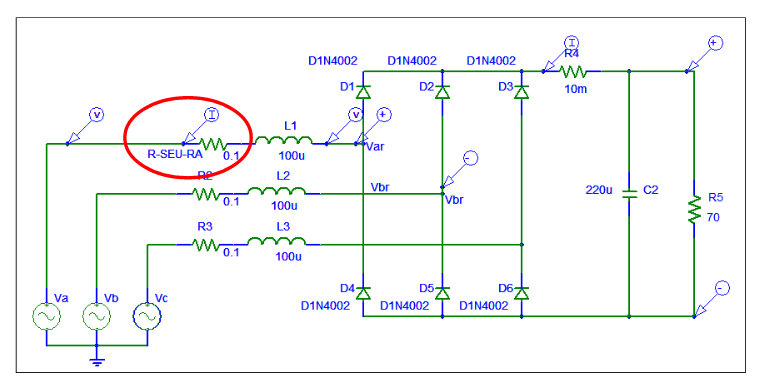

In [2]:
display(Image("circuit.png"))

# Circuito simulado (utilizando ngspice)

Foi adicionado o reistor R6 (10Mohm) para que o circuito tivesse convergência no SPICE.

In [3]:
%%bash

cat netlist.cir

* NETLIST
va a 0 dc 0 SIN(0 50 60 0 0 0.0)
vb b 0 dc 0 SIN(0 50 60 0 0 240.0)
vc c 0 dc 0 SIN(0 50 60 0 0 120.0)

r186062 a ar 0.1
r2 b br 0.1
r3 c cr 0.1

l1 ar var 100u
l2 br vbr 100u
l3 cr vcr 100u

d1 var d 1n4002
d2 vbr d 1n4002
d3 vcr d 1n4002

d4 on var 1n4002
d5 on vbr 1n4002
d6 on vcr 1n4002

r4 d e 10m
v0 op e dc 0

c2 op on 220u

r5 op on 70

r6 on 0 10meg


# "Inrush" de corrente

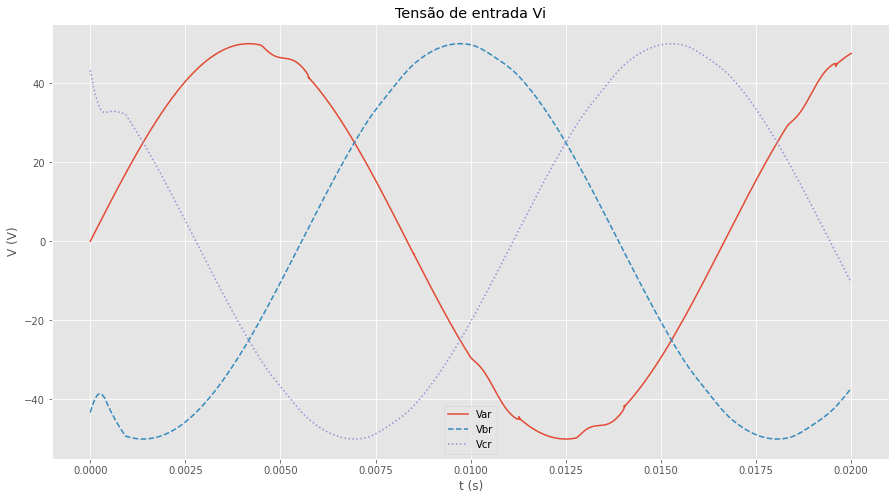

In [4]:
va = np.genfromtxt('data/01-var.csv')
vb = np.genfromtxt('data/01-vbr.csv')
vc = np.genfromtxt('data/01-vcr.csv')


fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(va[:,0], va[:,1])
ax1.plot(vb[:,0], vb[:,1], '--')
ax1.plot(vc[:,0], vc[:,1], ':')
ax1.set_title("Tensão de entrada Vi")
ax1.set_ylabel("V (V)")
ax1.set_xlabel("t (s)")
ax1.legend(['Var', 'Vbr', 'Vcr'])
plt.show()

As formas de onda acima (Var, Vbr e Vcr) mostram uma fonte trifásica (50V, 60Hz).

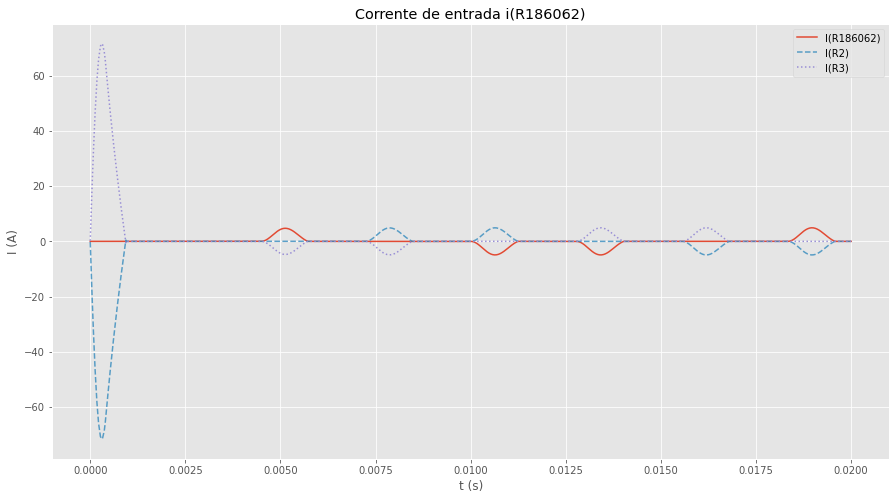

In [5]:
ir1 = np.genfromtxt('data/01-ir1.csv')
ir2 = np.genfromtxt('data/01-ir2.csv')
ir3 = np.genfromtxt('data/01-ir3.csv')

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(ir1[:,0], ir1[:,1])
ax1.plot(ir2[:,0], ir2[:,1], '--', alpha=0.8)
ax1.plot(ir3[:,0], ir3[:,1], ':', alpha=1)
ax1.set_title("Corrente de entrada i(R186062)")
ax1.set_ylabel("I (A)")
ax1.set_xlabel("t (s)")
ax1.legend(["I(R186062)", "I(R2)", "I(R3)"])
plt.show()

Ao analisar a corrente de entrada percebemos a ausencia de um pico inicial de corrente na fase A, isso provavelmente se dá pelo fato de que o capacitor está inicialmente descarregado e rapidamente se carrega com as correntes advindas das fases B e C (picos de corrente).

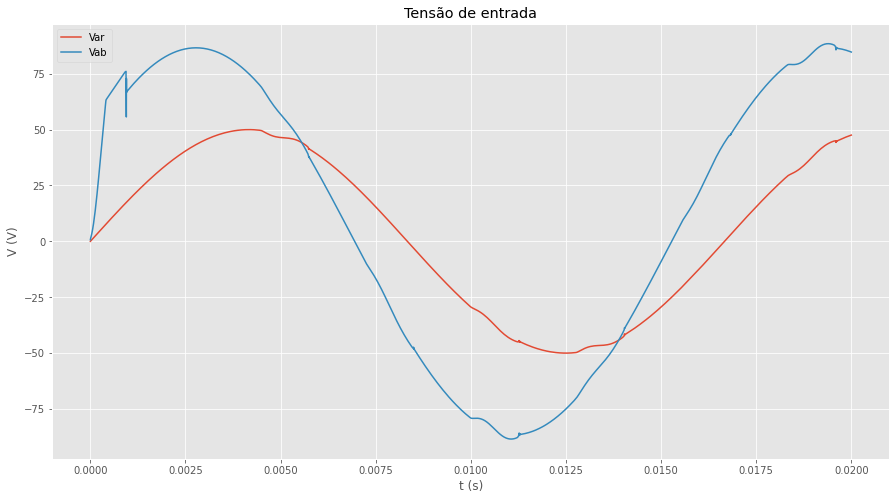

In [6]:
var = np.genfromtxt('data/01-var.csv')
vab = np.genfromtxt('data/01-vab.csv')

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(var[:,0], var[:,1])
ax1.plot(vab[:,0], vab[:,1])
ax1.set_title("Tensão de entrada")
ax1.set_ylabel("V (V)")
ax1.set_xlabel("t (s)")
ax1.legend(["Var", "Vab"])
plt.show()

Na figura acima é possível observar a deformação na tensão no início que advém do fato de que o capacitor do circuito está inicialmente descarregado, exigindo um fluxo intenso de corrente no início para que se carregue. Também é possível ver outras pequenas deformações no sinal, provavelmente devido a indutâncias da fonte.

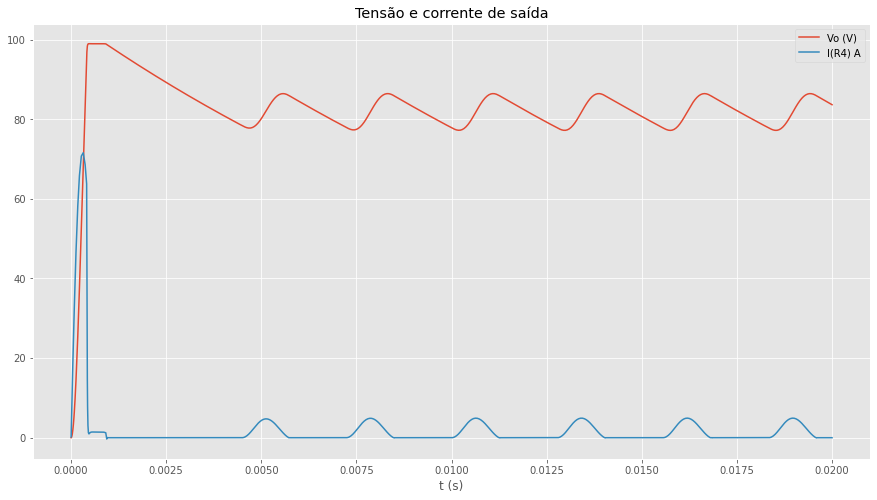

In [7]:
ir4 = np.genfromtxt('data/01-ir4.csv')
vo = np.genfromtxt('data/01-vout.csv')

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(vo[:,0], vo[:,1])
ax1.plot(ir4[:,0], ir4[:,1])
ax1.set_title("Tensão e corrente de saída")
ax1.set_xlabel("t (s)")
ax1.legend(["Vo (V)", "I(R4) A"])
plt.show()

Acima é possível observar um pico de corrente ao ligar a fonte (não há tensão no capacitor e, portanto, há um grande fluxo de corrente para o mesmo).
Nesta figura também é possível observar uma deformação no início da tensão de saída, pelo mesmo motivo. Há um pequeno *ripple* na tensão, e a corrente não é constante.

# Fator de potência e distorção da tensão na entrada do retificador

In [8]:
%%bash
echo data/02.out
cat data/02.out

data/02.out

Circuit: uncontrolled rectifier (fourier and pf analysis)

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
a                                            0
b                                     -43.3013
c                                      43.3013
ar                                 7.54564e-20
br                                    -43.1807
cr                                     43.1807
var                                7.54564e-20
vbr                                   -43.1807
vcr                                    43.1807
d                                      42.1972
on                                    -42.1972
e                                      42.1852
op                                     42.1852
l3#branch                              1.20546
l2#branch                             -1.20547
l1#branch       

Como mostra o arquivo .out acima, temos os seguintes valores:

$$
Va_{rms} = 35.35 \;\text{V} \quad I(R186062)_{rms} = 1.71 \;\text{A} \quad S = Va_{rms} \cdot I(R186062)_{rms} = 60.28 \;\text{W}
$$

$$
P = \frac{1}{T}\int _0^T v(t) \cdot i(t) dt = 33.02 \;\text{W} \quad PF = \frac{P}{S} = 0.5478
$$

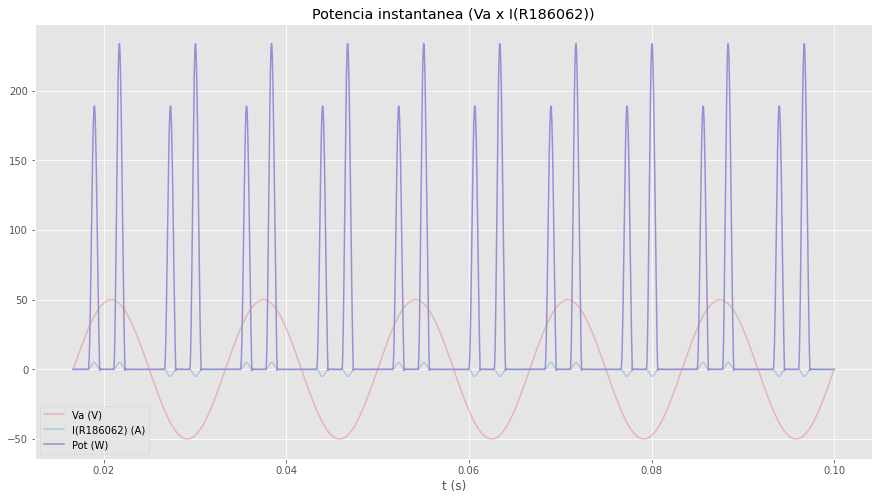

In [9]:
va = np.genfromtxt('data/02-va.csv')
ir1 = np.genfromtxt('data/02-ir1.csv')

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(va[:,0], va[:,1], alpha=0.3)
ax1.plot(ir1[:,0], ir1[:,1], alpha=0.3)
ax1.plot(va[:,0], np.multiply(va[:,1], ir1[:,1]), alpha=1)
ax1.set_title("Potencia instantanea (Va x I(R186062))")
ax1.set_xlabel("t (s)")
ax1.legend(["Va (V)", "I(R186062) (A)", "Pot (W)"])
plt.show()

Acima podemos ver o gráfico da potência instantêna ao calcular $p(t) = v(t)\cdot i(t)$.

Podemos calcular o FP utilizando a análise espectral da seguinte maneira:

$$
\text{FP} = \frac{\cos{\phi _1}}{\sqrt{1 + \text{TDH}^2}}
$$

Assim, commo a fase da primeira harmônica é:

$$\phi_1 = 10.35 - (-0.09) = 10.44\;^{\circ} = 0.1822 \;\text{rad}$$

e:

$$\text{TDH} = 1.39$$

então temos:
$$\text{FP} = 0.5743$$


O fator de potência calculado de ambas as formas são similares. Porém, como na análise espectral estamos nos reduzindo a apenas uma faixa limitada de frequências, o valor calculado com $\text{FP} = \frac{P}{S}$ é mais preciso e deve ser usado.

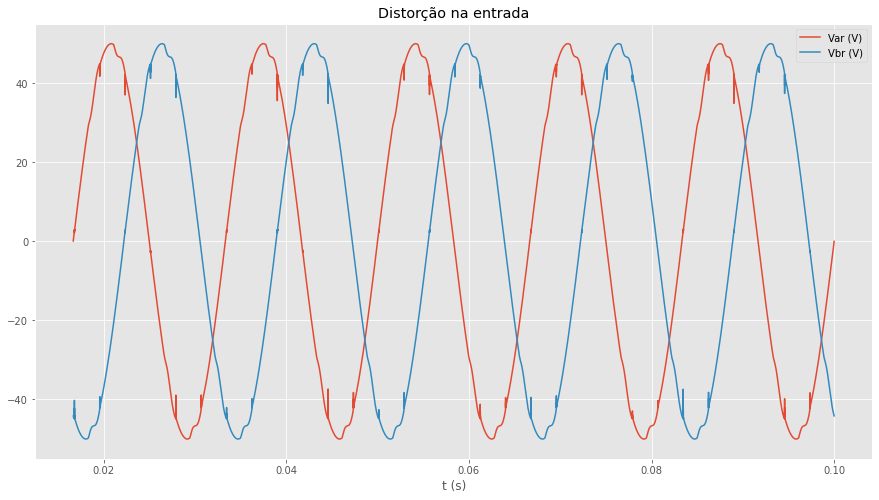

In [10]:
var = np.genfromtxt('data/02-var.csv')
vbr = np.genfromtxt('data/02-vbr.csv')

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(var[:,0], var[:,1])
ax1.plot(vbr[:,0], vbr[:,1])
ax1.set_title("Distorção na entrada")
ax1.set_xlabel("t (s)")
ax1.legend(["Var (V)", "Vbr (V)"])
plt.show()

Na análise espectral da corrente, a quinta harmônica têm magnitude significativamente elevada ($1.2\;\text{A}$). Este valor se reflete na tensão (quinta harmônica com magnitude $0.239\;\text(V)$), assim gerando mais deformações e podendo promover um mal funcionamento da rede elétrica.

# Comutação (simulação sem o capacitor de saída)

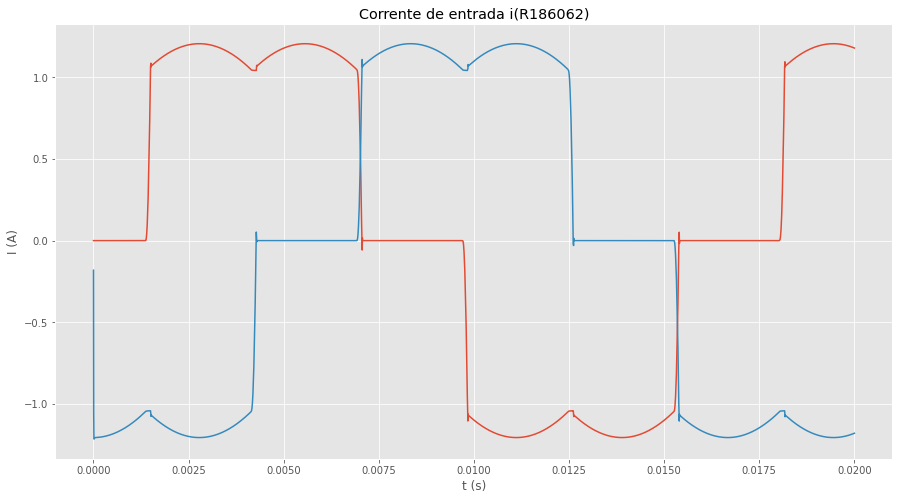

In [11]:
ir1 = np.genfromtxt('data/03-ir1.csv')
ir2 = np.genfromtxt('data/03-ir2.csv')

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(ir1[:,0], ir1[:,1])
ax1.plot(ir2[:,0], ir2[:,1])
ax1.set_title("Corrente de entrada i(R186062)")
ax1.set_ylabel("I (A)")
ax1.set_xlabel("t (s)")
plt.show()

Podemos perceber na figura acima que, ao se remover o capacitor, existem momentos em que há corrente de entrada em duas fases ao mesmo tempo, o que vai gerar deformações na tensão.

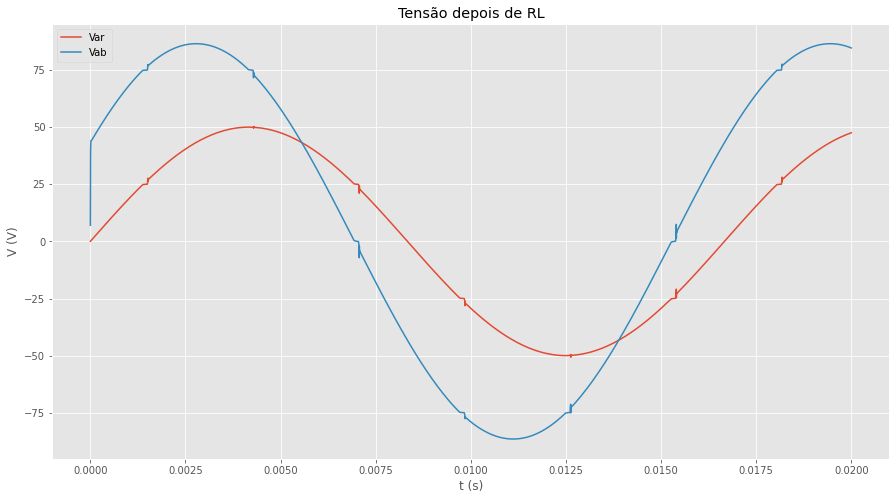

In [12]:
var = np.genfromtxt('data/03-var.csv')
vab = np.genfromtxt('data/03-vab.csv')

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(var[:,0], var[:,1])
ax1.plot(vab[:,0], vab[:,1])
ax1.set_title("Tensão depois de RL")
ax1.set_ylabel("V (V)")
ax1.set_xlabel("t (s)")
ax1.legend(["Var", "Vab"])
plt.show()

Na figura acima é possível observar a deformação na tensão que advém do fato de que não há um chaveamento rápido o suficiente dos diodos, a comutação mais lenta dos diodos faz com que surjam deformações nas tensões de entrada do retificador, devído aos momentos em que mais de um diodo estão ativados ao mesmo tempo.

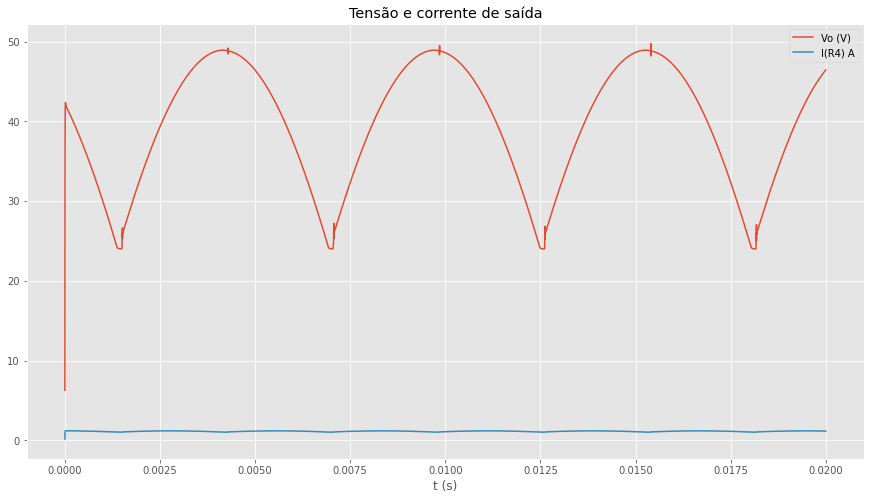

In [13]:
ir4 = np.genfromtxt('data/03-ir4.csv')
vo = np.genfromtxt('data/03-vout.csv')

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(vo[:,0], vo[:,1])
ax1.plot(ir4[:,0], ir4[:,1])
ax1.set_title("Tensão e corrente de saída")
ax1.set_xlabel("t (s)")
ax1.legend(["Vo (V)", "I(R4) A"])
plt.show()

Ao remover o capacitor na saída, temos um *ripple* significativamente maior na tensão Vo, porém anulamos o pico de corrente causado pelo carregamento do capacitor C2.